In [1]:
import numpy as np
import pandas as pd

In [2]:
x=np.array([2,1])
np.linalg.norm(x)

2.23606797749979

In [3]:
x=np.array([4,2])
np.linalg.norm(x)

4.47213595499958

In [4]:
a=np.array([1,1])
b=np.array([-1,1])
a @ b

0

In [ ]:
#추천시스템(CF 기반)
#CF: 유사도 기반 평점 예측, 영화 추천, 음악 추천...등에 활용됨
#사용자기반/아이템(하이브리드)기반 CF
#아이템기반:사용자 정보 부족, 여러 트랜잭션에서 중복 아이템이
#적은 경우(의미있는 데이터 추출이 어려운 경우)

#홍길동(트랜잭션):A, B(아이템)
#임꺽정:C,D
#이순신:E,F

In [5]:
critics={
    'BTS':{'암수살인':5, '바울':4, '할로윈':1.5},
    '손흥민':{'바울':5, '할로윈':2},
    '조용필':{'암수살인':2.5, '바울':2, '할로윈':1},
    '나훈아':{'암수살인':3.5, '바울':4, '할로윈':5}
}

In [11]:
print(critics.get('BTS'))
print(critics['BTS'])

{'암수살인': 5, '바울': 4, '할로윈': 1.5}
{'암수살인': 5, '바울': 4, '할로윈': 1.5}


In [13]:
#print(critics.get('BTS2')) #None
#print(critics['BTS2'])    #에러

In [14]:
print(critics.get('BTS').get('암수살인'))

5


In [15]:
#피타고라스(2차원)
from math import sqrt
sqrt(pow(1,2)+pow(3,2))

3.1622776601683795

In [16]:
def sim(i, j):
    return sqrt(pow(i,2)+pow(j,2))

In [19]:
var1=critics['손흥민']['바울']-critics['조용필']['바울']
var2=critics['손흥민']['할로윈']-critics['조용필']['할로윈']
sim(var1,var2)

3.1622776601683795

In [23]:
for i in critics:
    if i!='손흥민':
        var1=critics['손흥민']['바울']-critics[i]['바울']
        var2=critics['손흥민']['할로윈']-critics[i]['할로윈']
        print(i, " : ", 1/(1+sim(var1,var2)) )
    #손흥민과 다른사람과의 거리

BTS  :  0.4721359549995794
조용필  :  0.2402530733520421
나훈아  :  0.2402530733520421


In [ ]:
# 10편 영화, 100점 만점 평점
# 9편의 영화, 손 & B : 동일한 평점
# 1편의 영화 손:0점, B:100점 
        

In [26]:
def sim_distance(data,user1, user2):
    #유클리디안 기반 거리(같은 영화 본것에 대한)
    rsum=0
    for i in data[user1]: #i:손흥민이 본 영화 중 한 편
        if i in data[user2]:#같은 영화
            rsum+=pow(data[user1][i]-data[user2][i],2)
    return 1/(1+sqrt(rsum))
    
print(sim_distance(critics, '손흥민', 'BTS'))


0.4721359549995794


In [ ]:
#인원에 상관없이
#정렬 -> 가장 유사한 상위 n명 추출하는 기능

#prototype 
#top_match(영화평점딕셔너리, 기준사람(손흥민), 상위N명, 적용함수)

In [28]:
def top_match(data, name, n=2, sim_f=sim_distance):
#구현
    myList=[]
    for i in data:
        if name!=i:
            myList.append((sim_f(data,name,i),i))
    myList.sort()
    myList.reverse()
    return myList[:n]
top_match(critics, '손흥민')

[(0.4721359549995794, 'BTS'), (0.2402530733520421, '조용필')]

In [29]:
# 출력 예시
# 유사도, 이름
# 유사도, 이름

In [30]:
critics = {
    '조용필': {
        '택시운전사': 2.5,
        '겨울왕국': 3.5,
        '리빙라스베가스': 3.0,
        '넘버3': 3.5,
        '사랑과전쟁': 2.5,
        '세계대전': 3.0,
    },
    'BTS': {
        '택시운전사': 1.0,
        '겨울왕국': 4.5,
        '리빙라스베가스': 0.5,
        '넘버3': 1.5,
        '사랑과전쟁': 4.5,
        '세계대전': 5.0,
    },
    '강감찬': {
        '택시운전사': 3.0,
        '겨울왕국': 3.5,
        '리빙라스베가스': 1.5,
        '넘버3': 5.0,
        '세계대전': 3.0,
        '사랑과전쟁': 3.5,
    },
    '을지문덕': {
        '택시운전사': 2.5,
        '겨울왕국': 3.0,
        '넘버3': 3.5,
        '세계대전': 4.0,
    },
    '김유신': {
        '겨울왕국': 3.5,
        '리빙라스베가스': 3.0,
        '세계대전': 4.5,
        '넘버3': 4.0,
        '사랑과전쟁': 2.5,
    },
    '유성룡': {
        '택시운전사': 3.0,
        '겨울왕국': 4.0,
        '리빙라스베가스': 2.0,
        '넘버3': 3.0,
        '세계대전': 3.5,
        '사랑과전쟁': 2.0,
    },
    '이황': {
        '택시운전사': 3.0,
        '겨울왕국': 4.0,
        '세계대전': 3.0,
        '넘버3': 5.0,
        '사랑과전쟁': 3.5,
    },
    '이이': {'겨울왕국': 4.5, '사랑과전쟁': 1.0,
             '넘버3': 4.0},
}


In [31]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [32]:
import matplotlib.pyplot as plt

[0, 5, 0, 5]

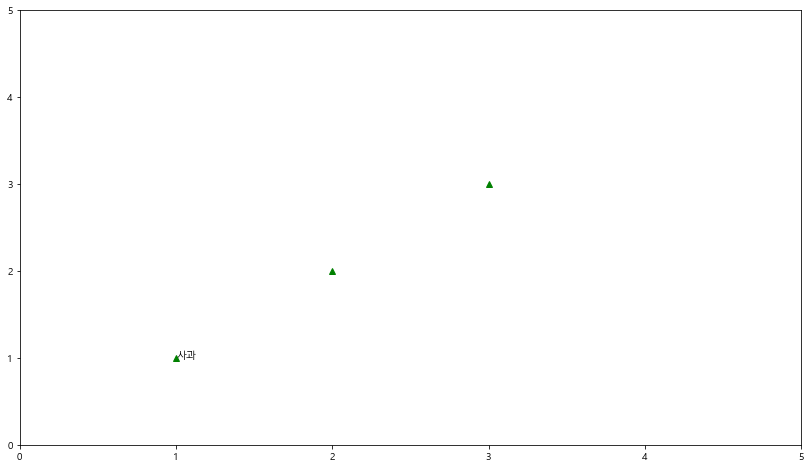

In [36]:
plt.figure(figsize=(14,8))
plt.plot([1,2,3], [1,2,3], 'g^')
#   plot([손흥민 평점], [이순신 평점], )
plt.text(1,1,'사과')
plt.axis([0,5,0,5])

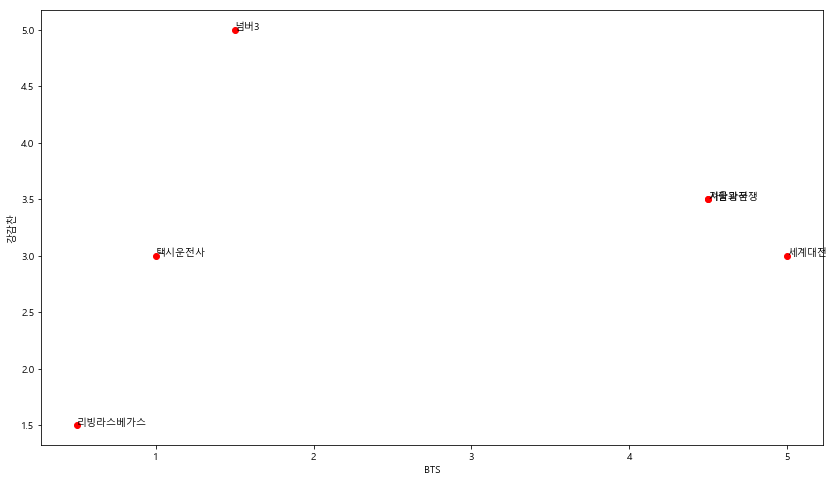

In [46]:
def drawGraph(data, name1, name2):
    li1=[]
    li2=[]
    plt.figure(figsize=(14,8))
#     print(data[name1]['겨울왕국'])
#     print(data[name2]['겨울왕국'])    
    for i in data[name1]:
        if i in data[name2]:
            li1.append(data[name1][i])
            li2.append(data[name2][i])
            plt.text(data[name1][i], data[name2][i], i)
    plt.plot(li1, li2, 'ro')
    plt.xlabel(name1)
    plt.ylabel(name2)
    
drawGraph(critics, 'BTS', '강감찬')   

In [48]:
def sim_pearson(data, name1, name2):
    sumX=0 # X의 합
    sumY=0 # Y의 합
    sumPowX=0 # X 제곱의 합
    sumPowY=0 # Y 제곱의 합
    sumXY=0 # X*Y의 합
    count=0 #영화 개수
    
    for i in data[name1]: # i = key
        if i in data[name2]: # 같은 영화를 평가했을때만
            sumX+=data[name1][i]
            sumY+=data[name2][i]
            sumPowX+=pow(data[name1][i],2)
            sumPowY+=pow(data[name2][i],2)
            sumXY+=data[name1][i]*data[name2][i]
            count+=1
    
    return ( sumXY- ((sumX*sumY)/count) )/ sqrt( (sumPowX - (pow(sumX,2) / count)) * (sumPowY - (pow(sumY,2)/count)))
 



In [49]:
print(sim_pearson(critics, 'BTS', '강감찬'))
#두 사람의 상관계수가 출력
#'BTS'와 나머지 전체 사람들과의 상관계수
#전체에 대해 상관계수(상위 n개 상관계수 리스트 출력)


0.21693045781865616


In [51]:
def top_match(data, name, n=3, sim_f=sim_pearson):
#구현
    myList=[]
    for i in data:
        if name!=i:
            myList.append((sim_f(data,name,i),i))
    myList.sort()
    myList.reverse()
    return myList[:n]

In [52]:
top_match(critics, '강감찬', 3)

[(0.963795681875635, '이황'),
 (0.39605901719066977, '조용필'),
 (0.38124642583151164, '이이')]

In [ ]:
# 추천시스템(오늘 연습문제)
# 예상평점 구해보자
#     - 예상 점수 : 유사도 * (상대방의) 평점
#     ex) '강감찬'이 안본 영화중 'A'영화를
#     다른 사람들은 각각 4, 3, 2점 평점 줬다고 가정.
#     유사도를 구해보니 0.9, 0.3, 0.7로 나왔다면,
#     0.9*4점 => 3.6점 예상
#     0.3*3점 => 0.9점 예상
#     0.7*2점 => 1.4점 예상
#     예상점수 총합 = 5.9점(예상점수합)/1.9점(유사도합)
#     =>약 3점 예상됨
#     ...
#     만약 A영화 3점, B영화 2점, C영화 4점으로 예상됐다면
#     강감찬에게 'C'영화를 추천
    
    

In [ ]:
def getRec():
    #구현

In [53]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [56]:
train.head()
test.head()
train_id=train['Id']
test_id=test['Id']

In [57]:
train.drop("Id", axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)

In [59]:
train.head()
import matplotlib.pyplot as plt
import seaborn as sns

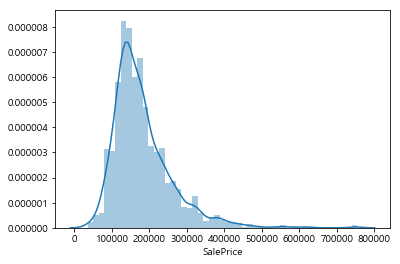

In [62]:
train.columns
sns.distplot(train['SalePrice'])

In [70]:
ntrain=train.shape[0] #(1460, 80)
ntest=test.shape[0]#(1459, 79)
ytrain=train.SalePrice.values

In [71]:
#트레이닝 + 테스트 => null 처리

In [82]:
allData=pd.concat((train, test)).reset_index(drop=True)
allData.drop(['SalePrice'], axis=1, inplace=True)
allData.head()
allData.shape
len(allData)

2919

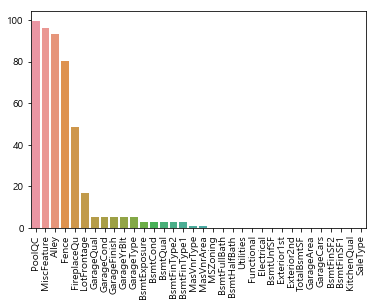

In [93]:
allNa=(allData.isnull().sum() / len(allData))*100
allNa #na 비율
#문제
#na비율을 기준으로 내림차순 정렬
#na비율이 0인 컬럼들은 제외

#출력
# PoolQC           99.657417
# MiscFeature      96.402878
# ...

allNa=allNa.drop(allNa[allNa==0].index).sort_values(ascending=False)
allNa
missingData=pd.DataFrame({'NA Ratio' : allNa})
missingData

plt.xticks(rotation='90')
sns.barplot(x=allNa.index, y=allNa)